In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
k = 10          # Reservoir rock permeability in md
q = 100         # Oil flow rate in STB/D
B0 = 1.1        # Oil formation volume in bbl/STB
viscosity = 0.9 # Oil viscosity in cp
h = 40          # Reservoir Thickness (ft)
pe = 900        # Reservoir boundary pressure (psi)
re = 1200       # Reservoir radius (ft)
rw = 0.4        # Wellbore radius (ft)

In [ ]:
r = np.random.uniform(rw,re,8000)
r.sort()
df = pd.DataFrame({"r" : r})
df["p"] = pe - ((141.2*q*B0*viscosity*np.log(re/df["r"]))/(k*h))

In [ ]:
def skin_effect(s,rs):
    plt.figure(figsize = (15,8))
    ks = (k*(np.log(rs/rw)))/(s + np.log(rs/rw))
    t = np.random.uniform(rw,rs,1000)
    t.sort()
    rf = pd.DataFrame({"t" : t})
    rf["q"] = pe - (141.2*q*B0*viscosity*(((np.log(re/rs))/k)+(np.log(rs/rf["t"]))/ks))/h
    plt.plot(df["r"],df["p"], c = "b" , label= " Pressure profile of undamaged well")
    plt.plot(rf["t"],rf["q"], c = "r", label= " Pressure profile of damaged well")
    plt.xlim(0.3,50)
    plt.ylim(1000,2500)
    plt.xlabel("radius from wellbore")
    plt.ylabel("reservoir pressure")
    plt.title("Skin and skin zone effect on reservoir pressure drowdown")
    plt.style.use('dark_background')
    plt.grid(True, color = 'g')

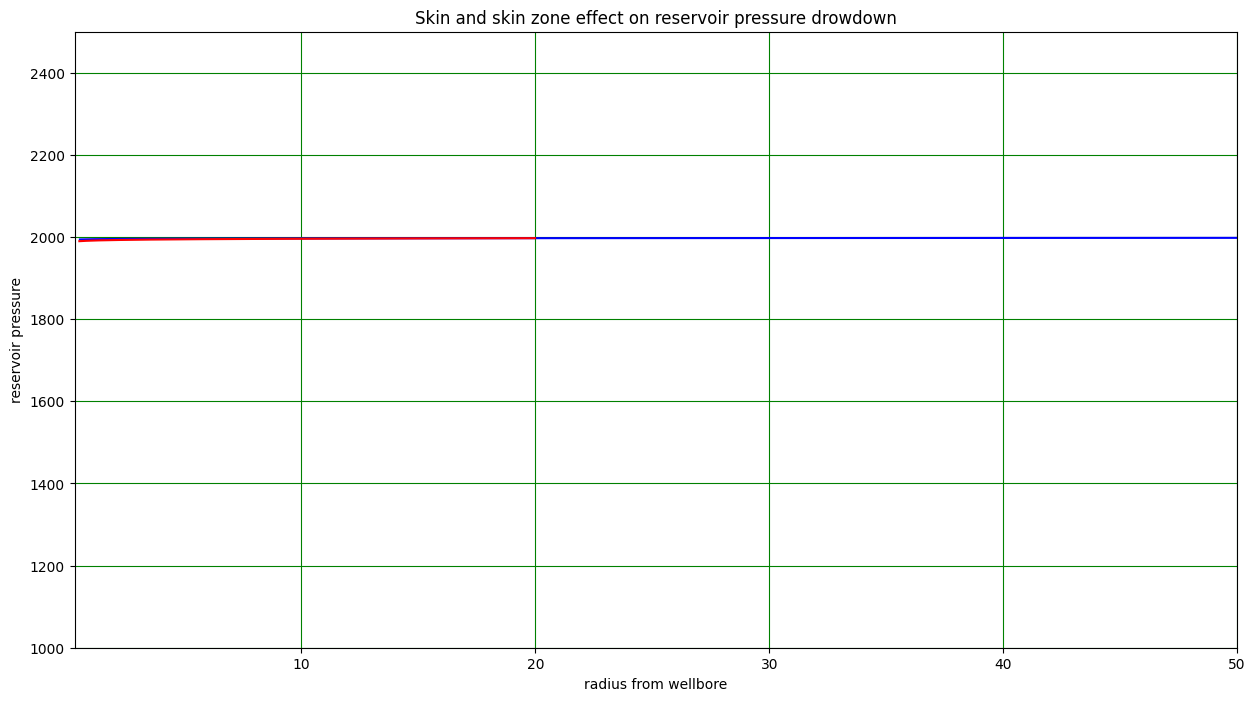

In [ ]:
skin_effect(5,20)

In [7]:
from ipywidgets import interact,interactive

In [ ]:
interactive(skin_effect , s =(-3,10,0.2), rs = (0.5,25,0.2))